In [80]:
using Images, ImageView, ImageFiltering
br = load("bridge.jpg")
imshow(br)
#= You can find misty.jpg and bridge.jpg in the resources folder, 
make sure to put it in the same directory you run the code =#

Dict{String, Any} with 4 entries:
  "gui"         => Dict{String, Any}("window"=>GtkWindowLeaf(name="", parent, w…
  "roi"         => Dict{String, Any}("redraw"=>900: "map(clim-mapped image, inp…
  "annotations" => 853: "input-206" = Dict{UInt64, Any}() Dict{UInt64, Any} 
  "clim"        => 852: "CLim" = CLim{RGB{Float64}}(RGB{Float64}(0.0,0.0,0.0), …

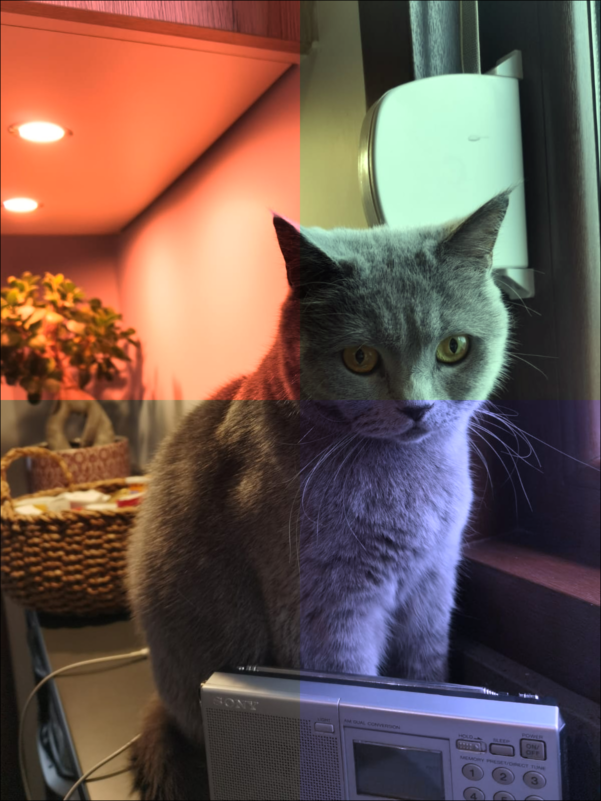

In [47]:
misty = load("misty.jpg") 
channel_view = channelview(misty); #converts misty to an array that can be modified
channel_view = permuteddimsview(channel_view, (2, 3, 1)); #changes channel locations for convenience: height, width, rgb

x_coords = 1:599 #you can specify any range of x coords here, since width is 1200 this is right half of image now
x_coords_2 = 600:1200 

y_coords = 1:799
y_coords_2 = 800:1600

channel_view[y_coords, x_coords, 1] = min.(channel_view[y_coords, x_coords, 1] .* 1.8, 1); 
# multiplies red pixels (top left) by 1.8 but restricts their maximum value to 1, using the min function.

channel_view[y_coords, x_coords_2 , 2] = min.(channel_view[y_coords, x_coords_2, 2] .* 1.2, 1);  
# multiplies green pixels (top right) by 1.2 but restricts their maximum value to 1, using the min function

channel_view[y_coords_2, x_coords_2, 3] = min.(channel_view[y_coords_2, x_coords_2, 3] .* 1.4, 1);
# multiplies blue pixels (bottom right) in  by 1.4 but restricts their maximum value to 1, using the min function

# bottom left of image is left untouched

misty

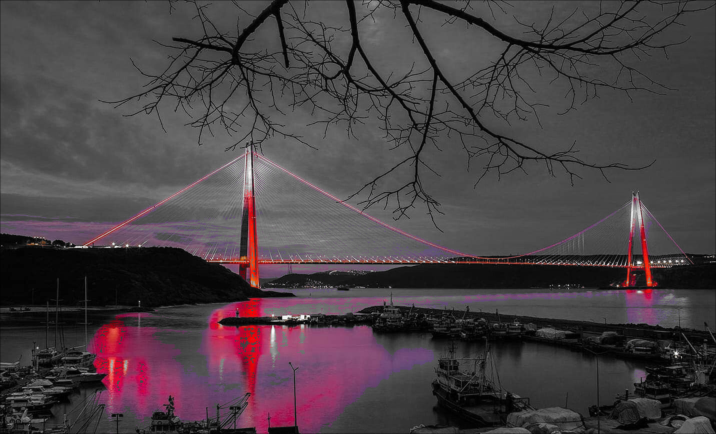

In [82]:
# individual pixel values can be modified like this to incrase saturation.
# now let's do something even cooler!
# we can create a color filter using the same principle

img = load("bridge.jpg")
gray_img = RGB.(Gray.(img)) # creates a gray img

channel_view = channelview(img); 
channel_view_gray = channelview(gray_img);

img_array = permuteddimsview(channel_view, (2, 3, 1)); # creates array of img with height, width, rgb
gray_img_array = permuteddimsview(channel_view_gray, (2, 3, 1)); # creates array of gray img with height, width, grayvalue
 
mask = fill(true, size(img)); # creates a grid of true values with the size of img

retained_colors_x = 500:508; # the pixels that are in this range are going to be
retained_colors_y = 400:470; # the colors that will stay in the final image (as a range, not specific values)

# img[retained_colors_x, retained_colors_y] # uncomment this to see the selected color range

for channel_id = 1:3
    
    # views the image array only in specific channel (for loop)
    current_channel = view(img_array, :, :, channel_id) 
    # takes the retained color part only in specified channel
    retained_color_area = current_channel[retained_colors_y, retained_colors_x, :] 
    
    #gets minimum and maximum channel values from the retained color area
    channel_min = minimum(retained_color_area)
    channel_max = maximum(retained_color_area)
    
    # only the pixels from the full image that are in the retained color area return true to the image mask 
    channel_mask = channel_min .< current_channel .< channel_max
    mask = mask .& channel_mask
end
# only the pixels that correspond to true in the general mask retain their pixel values
# the rest is replaced with the gray image
img_masked = img_array .* mask .+ gray_img_array .* .~(mask);
# converts the array to an image that we can view (also puts the channels back into place)
final_image = colorview(RGB, permutedims(img_masked, (3, 1, 2)))
